In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, KFold
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model 
import tensorflow.keras.backend 
import shap

In [3]:
#put your data and py file in the same directory
raw_data = pd.read_csv('adult.csv')

In [3]:
raw_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'],
      dtype='object')

In [ ]:
raw_data.workclass.value_counts()

In [ ]:
raw_data.workclass.value_counts()

In [ ]:
raw_data.occupation.value_counts()

In [ ]:
raw_data.occupation.value_counts()

In [4]:
pd.set_option('display.max_columns',200)
raw_data.drop(['education','relationship','Unnamed: 15','Unnamed: 16','Unnamed: 17'] ,axis = 1, inplace = True)

In [5]:
row = raw_data['occupation'].value_counts()
row.drop(row.index[7],inplace = True)

In [6]:
summ = 0
for i  in row:
    summ += i
list_perc = []
for i, j in zip(row, row.index):
    list_perc.append(i/summ)
resultofo = np.random.choice(row.index,1843, p = list_perc)


In [7]:
raw_data.sort_values(['occupation'],inplace = True)
for i in range(0,1843):    
    raw_data.iloc[i,5] = resultofo[i]
    

In [7]:
#Replace '?'' in workclass to private (mode method)
workclass = raw_data['workclass'].replace("?",'Private')
raw_data['workclass'] = workclass


In [9]:
df_x = pd.get_dummies(raw_data,drop_first = True)


In [10]:
df_y = df_x.iloc[:,-1]
df_x.drop('income_>50K',axis = 1,inplace = True)

In [ ]:
df_x

In [ ]:
df_x.describe()

In [ ]:
df_y.describe()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2,random_state = 1)

### Random Forest

In [72]:
#auc scire is not avialable because there is no cut-off value for this algorithm
n_estimators  = [50,150,200,250,300]
for i in n_estimators:
    RFC = RandomForestClassifier(n_estimators = i,max_features = 'auto')
    kfoldCV = KFold(n_splits = 5)
    result2 = cross_val_score(RFC,X_train, y_train, cv=kfoldCV)
    print(f'Accuracy: %f ---- ' %result2.mean(), 'n-estimators = %d' %i)

Accuracy: 0.854615 ----  n-estimators = 50
Accuracy: 0.856035 ----  n-estimators = 150
Accuracy: 0.854883 ----  n-estimators = 200
Accuracy: 0.854691 ----  n-estimators = 250
Accuracy: 0.855459 ----  n-estimators = 300


### XGboost classifier


In [74]:
#'random state' use for initialize status for random number
kfoldCV = StratifiedKFold(n_splits=5)
n_estimators  = [50,150,200,250,300]
for i in n_estimators:
    xgb_model = XGBClassifier(n_estimators = i)
    results = cross_val_score(xgb_model, X_train, y_train, cv=kfoldCV)
    print(f'Accuracy: %f ---- ' %results.mean(), 'n-estimators = %d' %i  )


Accuracy: 0.870316 ----  n-estimators = 50
Accuracy: 0.866439 ----  n-estimators = 150
Accuracy: 0.864174 ----  n-estimators = 200
Accuracy: 0.862523 ----  n-estimators = 250
Accuracy: 0.861563 ----  n-estimators = 300


Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).

In [14]:
print(sum(y_train)/len(y_train))
print(sum(y_test)/len(y_test))

0.2415924447174447
0.23767848917549517


In [78]:
xgb_model.fit(X_train, y_train, eval_metric = 'aucpr',early_stopping_rounds= 10, eval_set = [(X_test, y_test)])

[0]	validation_0-aucpr:0.76639
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.77552
[2]	validation_0-aucpr:0.78910
[3]	validation_0-aucpr:0.79266
[4]	validation_0-aucpr:0.79744
[5]	validation_0-aucpr:0.80277
[6]	validation_0-aucpr:0.80461
[7]	validation_0-aucpr:0.80738
[8]	validation_0-aucpr:0.80836
[9]	validation_0-aucpr:0.81145
[10]	validation_0-aucpr:0.81340
[11]	validation_0-aucpr:0.81423
[12]	validation_0-aucpr:0.81470
[13]	validation_0-aucpr:0.81825
[14]	validation_0-aucpr:0.81848
[15]	validation_0-aucpr:0.82015
[16]	validation_0-aucpr:0.82062
[17]	validation_0-aucpr:0.82040
[18]	validation_0-aucpr:0.82235
[19]	validation_0-aucpr:0.82395
[20]	validation_0-aucpr:0.82440
[21]	validation_0-aucpr:0.82481
[22]	validation_0-aucpr:0.82478
[23]	validation_0-aucpr:0.82618
[24]	validation_0-aucpr:0.82744
[25]	validation_0-aucpr:0.82761
[26]	validation_0-aucpr:0.82776
[27]	validation_0-aucpr:0.82856
[28]	validation_0-aucpr:0.82918
[29]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
#shap
#X_display,y_display = shap.raw_data.adult(display=True
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)


#Large positive values mean a player is likely to win, while large negative values mean they are likely to lose.

In [17]:
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[0,:],X_test.iloc[0,:])

#shap plot gives the feature contributions for every single prediction

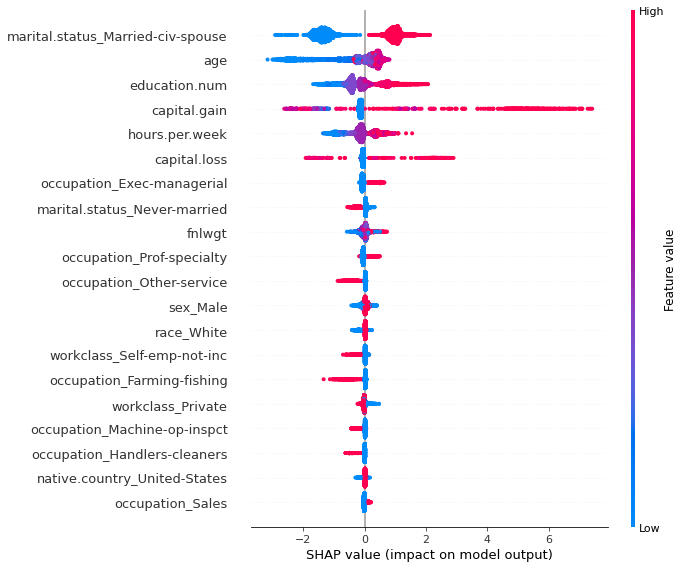

In [18]:
shap.summary_plot(shap_values, X_test)
#married-civ-spouse = not married legally

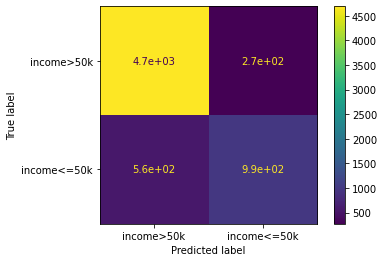

In [19]:
plot_confusion_matrix(xgb_model,X_test,y_test,display_labels = ["income>50k","income<=50k"])

In [65]:
print('TPR')
print(4.7e+03/ (4.7e+03+ 2.7e+02))

print('TNR')
print(9.9e+02 / (5.6e+02 + 9.9e+02))

TPR
0.9456740442655935
TNR
0.6387096774193548


Text(0, 0.5, 'TPR')

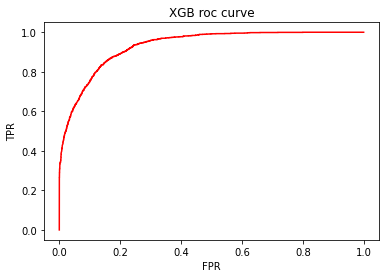

In [113]:
predicted_values2 = xgb_model.predict_proba(X_test)[:,1]

FPR, TPR ,thresh = roc_curve(y_test, predicted_values2)
plt.plot(FPR,TPR, color = 'red')
plt.title('XGB roc curve')
plt.xlabel('FPR') 
plt.ylabel("TPR")

In [15]:
#predict on test data
prediction = xgb_model.predict(X_test)
summary = classification_report(y_test,prediction)
print(summary)



              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4965
           1       0.78      0.64      0.70      1548

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513



In [ ]:
#precision is in our prediction, how many positive data are being predict by us.     

### Logistic regression


In [81]:

logit = LogisticRegression(solver='lbfgs')
kfoldCV = KFold(n_splits =4)
result3 = cross_val_score(logit,X_train, y_train, cv=kfoldCV)
print(f'Accuracy: %f ---- ' %result3.mean())

Accuracy: 0.797182 ---- 


In [86]:
predicted_values3 = logit.predict_proba(X_test)[:,1]
logit_auc =  roc_auc_score(y_test, predicted_values3)
print(f'the auc score for logit model will be %f'  %logit_auc) 

the auc score for logit model will be 0.585546


Text(0, 0.5, 'TPR')

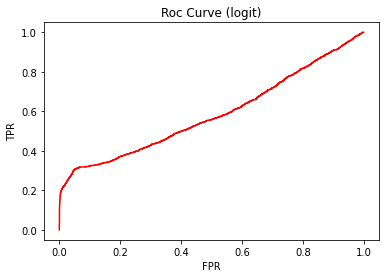

In [90]:
FPR, TPR ,thresh = roc_curve(y_test, predicted_values3)
plt.plot(FPR,TPR, color = 'red')
plt.title('Roc Curve (logit)')
plt.xlabel('FPR') 
plt.ylabel("TPR")

### Gradient boost


In [100]:
#X_train, X_test, y_train, y_test 
for trees in [50,150,200,250,300]:
    for learnin_rate in [0.1, 0.2, 0.5]:
        gbm_cl =GradientBoostingClassifier(n_estimators=trees, learning_rate=learnin_rate, 
                                    max_depth=4, random_state=0)
        result1 = cross_val_score(gbm_cl, X_train, y_train, cv=kfoldCV)
        print(f'accuracy is %f, when learning_rate = %f, trees = %f' %(result1.mean(), learnin_rate, trees))



accuracy is 0.864020, when learning_rate = 0.100000, trees = 50.000000
accuracy is 0.867783, when learning_rate = 0.200000, trees = 50.000000
accuracy is 0.867092, when learning_rate = 0.500000, trees = 50.000000
accuracy is 0.871238, when learning_rate = 0.100000, trees = 150.000000
accuracy is 0.871430, when learning_rate = 0.200000, trees = 150.000000
accuracy is 0.863061, when learning_rate = 0.500000, trees = 150.000000
accuracy is 0.872159, when learning_rate = 0.100000, trees = 200.000000
accuracy is 0.870163, when learning_rate = 0.200000, trees = 200.000000
accuracy is 0.861410, when learning_rate = 0.500000, trees = 200.000000
accuracy is 0.872428, when learning_rate = 0.100000, trees = 250.000000
accuracy is 0.869433, when learning_rate = 0.200000, trees = 250.000000
accuracy is 0.859529, when learning_rate = 0.500000, trees = 250.000000
accuracy is 0.872389, when learning_rate = 0.100000, trees = 300.000000
accuracy is 0.867821, when learning_rate = 0.200000, trees = 300.00

In [101]:
gbm_cl =GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, 
                                    max_depth=4, random_state=0)
result1 = cross_val_score(gbm_cl, X_train, y_train, cv=kfoldCV)
print(f'accuracy is %f, when learning_rate = %f, trees = %f' %(result1.mean(), learnin_rate, trees))


accuracy is 0.872389, when learning_rate = 0.500000, trees = 300.000000


In [107]:
gbm_cl.fit(X_train, y_train)
predicted_values = gbm_cl.predict_proba(X_test)[:,1]
print('auc score is :')
roc_auc_score(y_test, predicted_values)

auc score is :


0.9312768188690341

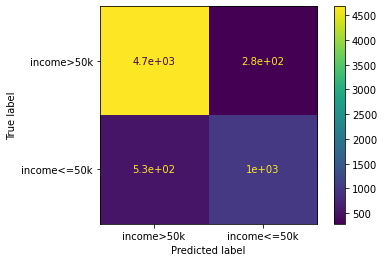

In [104]:
plot_confusion_matrix(gbm_cl,X_test,y_test,display_labels = ["income>50k","income<=50k"])

In [147]:
print('TPR')
print(4.7e+03/ (4.7e+03+ 2.8e+02))

print('TNR')
print(1e+03 / (5.3e+02 + 1e+03))

TPR
0.9437751004016064
TNR
0.6535947712418301


Text(0, 0.5, 'TPR')

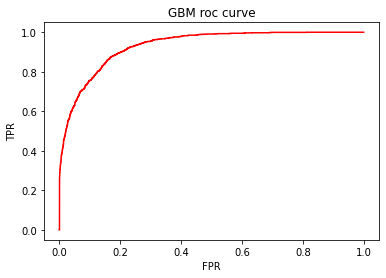

In [109]:
FPR, TPR ,thresh = roc_curve(y_test, predicted_values)
plt.plot(FPR,TPR, color = 'red')
plt.title('GBM roc curve')
plt.xlabel('FPR') 
plt.ylabel("TPR")

In [111]:
#Shap
#X_display,y_display = shap.raw_data.adult(display=True
explainer = shap.TreeExplainer(gbm_cl)
shap_values = explainer.shap_values(X_test)
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[0,:],X_test.iloc[0,:])

#shap plot gives the feature contributions for every single prediction

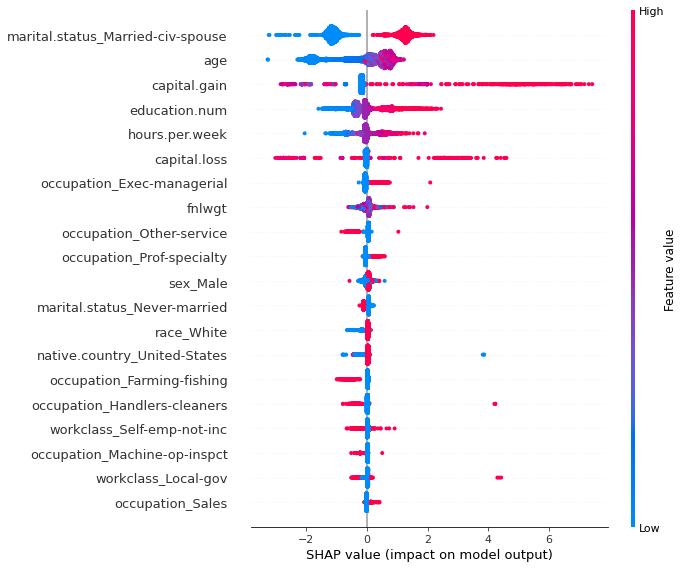

In [112]:
shap.summary_plot(shap_values, X_test)

In [ ]:
keras.backend.set_floatx('float64')


In [ ]:
# neural network model: Test Performance

# Predicting the Test set results


In [ ]:
#gridsearchcv
#max_depth
#learning_rate
#reg_lambda:10,20,100

### NN

In [123]:
#original
#the final layer will be sigmoid, which will push it towards into 1 and 0.
#in classifying two features that is exellent.
#estimate it with loss function, and improve it with optimizer.
#collection of function relu

classifier = Sequential()

classifier.add(Dense(units= 155 , input_dim=78, activation='relu' ))

classifier.add(Dense(units= 78 , activation='relu') )

classifier.add(Dense(units=1, activation= 'sigmoid'))

classifier.compile(loss='binary_crossentropy', optimizer='adam',
                   metrics=['accuracy'])

classifier.fit(X_train, y_train , batch_size = 16 , epochs = 20)


Epoch 1/20
1628/1628 [==============================] - 1s 792us/step - loss: 329.8681 - accuracy: 0.6789
Epoch 2/20
1628/1628 [==============================] - 1s 699us/step - loss: 152.4386 - accuracy: 0.6812
Epoch 3/20
1628/1628 [==============================] - 1s 719us/step - loss: 82.1138 - accuracy: 0.6811
Epoch 4/20
1628/1628 [==============================] - 1s 718us/step - loss: 46.3346 - accuracy: 0.6810
Epoch 5/20
1628/1628 [==============================] - 1s 699us/step - loss: 28.5434 - accuracy: 0.6801
Epoch 6/20
1628/1628 [==============================] - 1s 722us/step - loss: 12.9146 - accuracy: 0.6842
Epoch 7/20
1628/1628 [==============================] - 1s 781us/step - loss: 5.7854 - accuracy: 0.6868
Epoch 8/20
1628/1628 [==============================] - 1s 791us/step - loss: 2.4179 - accuracy: 0.7031
Epoch 9/20
1628/1628 [==============================] - 1s 736us/step - loss: 0.6892 - accuracy: 0.7599
Epoch 10/20
1628/1628 [==============================] -

In [124]:
y_predx = classifier.predict(X_test)
roc_auc_score(y_test, y_predx)

0.5148122126201238

In [122]:
#Allen's code
#drop regularization
from keras.layers import Dropout


classifier = Sequential()

classifier.add(Dense(units=155,kernel_initializer='glorot_uniform',
                    activation = 'relu'))


classifier.add(Dropout(rate=0.2))  

classifier.add(Dense(units=78,kernel_initializer='glorot_uniform',
                activation = 'relu'))
classifier.add(Dropout(rate=0.2))  


classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',
                    activation = 'sigmoid'))

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

classifier.fit(X_train,y_train,batch_size=16 , epochs=20)

Epoch 1/20
1628/1628 [==============================] - 2s 925us/step - loss: 126.2971 - accuracy: 0.7240
Epoch 2/20
1628/1628 [==============================] - 1s 886us/step - loss: 0.7235 - accuracy: 0.7590
Epoch 3/20
1628/1628 [==============================] - 1s 825us/step - loss: 0.8004 - accuracy: 0.7615
Epoch 4/20
1628/1628 [==============================] - 1s 834us/step - loss: 0.6344 - accuracy: 0.7621
Epoch 5/20
1628/1628 [==============================] - 1s 831us/step - loss: 0.6422 - accuracy: 0.7596
Epoch 6/20
1628/1628 [==============================] - 1s 837us/step - loss: 0.6542 - accuracy: 0.7590
Epoch 7/20
1628/1628 [==============================] - 1s 840us/step - loss: 0.6945 - accuracy: 0.7589
Epoch 8/20
1628/1628 [==============================] - 1s 849us/step - loss: 0.6955 - accuracy: 0.7588
Epoch 9/20
1628/1628 [==============================] - 1s 894us/step - loss: 0.5977 - accuracy: 0.7589
Epoch 10/20
1628/1628 [==============================] - 2s 97

In [48]:
# fine tuning with Grid Search
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units= 155 , input_dim=78, activation='relu' ))
        
    classifier.add(Dense(units= 78 , activation='relu' ))

    classifier.add(Dense(units=1, activation= 'sigmoid'))


    classifier.compile(loss='binary_crossentropy', optimizer='adam',
                   metrics=['accuracy'])

    classifier.fit(X_train, y_train, batch_size = 16 , epochs = 20)
    return classifier

classifier = KerasClassifier(build_fn=build_classifier)

# create a dictionary of hyper-parameters to optimize
parameters = {'batch_size':[16,32], 'nb_epoch':[10,20],'optimizer':['adam']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv=2)

grid_search = grid_search.fit(X_train,y_train)






Epoch 1/20
1628/1628 [==============================] - 1s 703us/step - loss: 269.4418 - accuracy: 0.6768
Epoch 2/20
1628/1628 [==============================] - 1s 692us/step - loss: 103.3686 - accuracy: 0.6795
Epoch 3/20
1628/1628 [==============================] - 1s 699us/step - loss: 67.7928 - accuracy: 0.6792
Epoch 4/20
1628/1628 [==============================] - 1s 688us/step - loss: 35.2773 - accuracy: 0.6821
Epoch 5/20
1628/1628 [==============================] - 1s 690us/step - loss: 16.4661 - accuracy: 0.6796
Epoch 6/20
1628/1628 [==============================] - 1s 691us/step - loss: 9.0213 - accuracy: 0.6830
Epoch 7/20
1628/1628 [==============================] - 1s 692us/step - loss: 5.0344 - accuracy: 0.6890
Epoch 8/20
1628/1628 [==============================] - 1s 701us/step - loss: 3.4929 - accuracy: 0.6974
Epoch 9/20
1628/1628 [==============================] - 1s 687us/step - loss: 1.6975 - accuracy: 0.7108
Epoch 10/20
1628/1628 [==============================] - 

1628/1628 [==============================] - 1s 909us/step - loss: 3.0642 - accuracy: 0.6961
Epoch 10/20
1628/1628 [==============================] - 1s 754us/step - loss: 1.4982 - accuracy: 0.71300s
Epoch 11/20
1628/1628 [==============================] - 1s 663us/step - loss: 0.7483 - accuracy: 0.7471
Epoch 12/20
1628/1628 [==============================] - 1s 671us/step - loss: 0.5739 - accuracy: 0.7808
Epoch 13/20
1628/1628 [==============================] - 1s 670us/step - loss: 0.5410 - accuracy: 0.7872
Epoch 14/20
1628/1628 [==============================] - 1s 668us/step - loss: 0.5314 - accuracy: 0.7873
Epoch 15/20
1628/1628 [==============================] - 1s 676us/step - loss: 0.5054 - accuracy: 0.7940
Epoch 16/20
1628/1628 [==============================] - 1s 860us/step - loss: 0.5191 - accuracy: 0.7867
Epoch 17/20
1628/1628 [==============================] - 1s 869us/step - loss: 0.5337 - accuracy: 0.7766
Epoch 18/20
1628/1628 [==============================] - 1s 797us

In [28]:
X_train.index = np.arange(0,X_train.shape[0])

In [43]:
y_pred = classifier.predict(X_test)
roc_auc_score(y_test, y_pred)
# 0.5457788498819904 


0.7015001001844956

In [50]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



0.798180 (0.001651) with: {'batch_size': 16, 'nb_epoch': 10, 'optimizer': 'adam'}
0.781365 (0.018543) with: {'batch_size': 16, 'nb_epoch': 20, 'optimizer': 'adam'}
0.780751 (0.018619) with: {'batch_size': 32, 'nb_epoch': 10, 'optimizer': 'adam'}
0.783937 (0.019579) with: {'batch_size': 32, 'nb_epoch': 20, 'optimizer': 'adam'}


In [52]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
best_parameters

{'batch_size': 16, 'nb_epoch': 10, 'optimizer': 'adam'}

In [136]:
#optional) optimizing activation function 
def opt_activation(optimizer = 'adam'):
    classifier = Sequential()
    classifier.add(Dense(units= 155 , input_dim=78, activation='relu' ))
        
    classifier.add(Dense(units= 78 , activation='relu' ))

    classifier.add(Dense(units=1, activation= 'sigmoid'))


    classifier.compile(loss='binary_crossentropy', optimizer=optimizer,
                   metrics=['accuracy'])

    return classifier



In [137]:
modelll = KerasClassifier(build_fn = opt_activation, batch_size = 16, epochs = 10)

In [140]:
optimizer = ['SGD','RMSprop','Adagrad','adam']
parameter_grid = dict(optimizer= optimizer)

In [142]:
grid = GridSearchCV(estimator = modelll, param_grid = parameter_grid, cv = 3)
grid_result =grid.fit(X_train,y_train)

Epoch 1/10
1086/1086 [==============================] - 1s 631us/step - loss: 2296990654267392.0000 - accuracy: 0.7568
Epoch 2/10
1086/1086 [==============================] - 1s 623us/step - loss: 0.5524 - accuracy: 0.7590
Epoch 3/10
1086/1086 [==============================] - 1s 632us/step - loss: 0.5520 - accuracy: 0.75900s - loss: 0.5499 - ac
Epoch 4/10
1086/1086 [==============================] - 1s 624us/step - loss: 0.5520 - accuracy: 0.7590
Epoch 5/10
1086/1086 [==============================] - 1s 622us/step - loss: 0.5520 - accuracy: 0.7590
Epoch 6/10
1086/1086 [==============================] - 1s 619us/step - loss: 0.5520 - accuracy: 0.7590
Epoch 7/10
1086/1086 [==============================] - 1s 634us/step - loss: 0.5520 - accuracy: 0.7590
Epoch 8/10
1086/1086 [==============================] - 1s 623us/step - loss: 0.5520 - accuracy: 0.7590
Epoch 9/10
1086/1086 [==============================] - 1s 621us/step - loss: 0.5520 - accuracy: 0.7590
Epoch 10/10
543/543 [======

{'best optimizer' is 'adam'}


In [13]:
type(X_train)

pandas.core.frame.DataFrame